In [ ]:
!pip install contextily
!pip install shapely
!pip install geopandas
!pip install geovoronoi

     |████████████████████████████████| 19.3 MB 1.3 MB/s 
     |████████████████████████████████| 994 kB 4.8 MB/s 
     |████████████████████████████████| 6.6 MB 16.1 MB/s 
     |████████████████████████████████| 15.4 MB 37 kB/s 
     |████████████████████████████████| 27.4 MB 97 kB/s 
  Attempting uninstall: scipy
    Found existing installation: scipy 1.4.1
    Uninstalling scipy-1.4.1:
      Successfully uninstalled scipy-1.4.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


In [ ]:
import numpy as np
import geopandas as gpd
import contextily as ctx
import matplotlib.pyplot as plt
from shapely.ops import cascaded_union
from geovoronoi.plotting import subplot_for_map, plot_voronoi_polys_with_points_in_area
from geovoronoi import voronoi_regions_from_coords, points_to_coords
import matplotlib

In [ ]:
matplotlib.rcParams['figure.figsize'] = (15,10)

In [ ]:
est = gpd.read_file("estacoes.shp")
est = est.dropna()
est.head()

,FID,N,Bacia,Rio,Estado,Município,Responsáv,Operadora,Tipo,Código,Estação,Latitude,Longitude,areadrenk,Escala,registnive,descargliq,Sedimentos,qualidadea,Telemétri,Operando,inicescala,inregtnive,inidescliq,sedinicio,iniqualida,Pluviômet,registrchu,Evaporimé,Climatoló,inicpluvio,iniregchuv,EvaporIní,ClimatIní,TelemIní,COD_STR,INIC_TEL,geometry
0,19834,19842,RIO SÃO FRANCISCO,-,GO,FORMOSA,CONS.CEMIG-CEB,CONS.CEMIG-CEB,Pluviométrica,1547045,UHE QUEIMADO MONTANTE,-15.958056,-47.374722,-,Não,Não,Não,Não,Não,Sim,Sim,-,-,-,-,-,Sim,Não,Não,Não,mai-05,-,-,-,2005-05-01,1547045,01/05/2005,POINT (-47.37472 -15.95806)
1,20146,20154,RIO PARANÁ,-,GO,SANTO ANTÔNIO DO DESCOBERTO,CORUMBÁ COM,CORUMBÁ COM,Pluviométrica,1648024,UHE CORUMBÁ IV FAZENDA BELA VISTA,-16.021111,-48.270278,-,Não,Não,Não,Não,Não,Sim,Sim,-,-,-,-,-,Sim,Não,Não,Não,abr-06,-,-,-,2006-04-01,1648024,01/04/2006,POINT (-48.27028 -16.02111)
2,20218,20226,RIO PARANÁ,-,DF,BRASÍLIA,CAESB,CAESB,Pluviométrica,1547013,TAQUARA,-15.632222,-47.520278,-,Não,Não,Não,Não,Não,Não,Sim,-,-,-,-,-,Sim,Sim,Não,Sim,dez-71,dez-10,-,dez-71,1899-12-30,1547013,00:00:00,POINT (-47.52028 -15.63222)
3,20244,20252,RIO PARANÁ,-,DF,BRASÍLIA,DEPV,DEPV,Pluviométrica,1547006,BRASÍLIA - AEROPORTO,-15.850000,-47.900000,-,Não,Não,Não,Não,Não,Não,Sim,-,-,-,-,-,Sim,Sim,Sim,Sim,jun-60,jun-60,jun-60,jun-60,1899-12-30,1547006,00:00:00,POINT (-47.90000 -15.85000)
4,20245,20253,RIO PARANÁ,-,DF,BRASÍLIA,CAESB,CAESB,Pluviométrica,1547048,ETE - SÃO SEBASTIÃO,-15.901389,-47.748056,-,Não,Não,Não,Não,Não,Não,Sim,-,-,-,-,-,Sim,Não,Não,Não,mai-07,-,-,-,1899-12-30,1547048,00:00:00,POINT (-47.74806 -15.90139)


In [ ]:
limite = gpd.read_file('Limite do DF.shp')
est = est.to_crs(limite.crs)

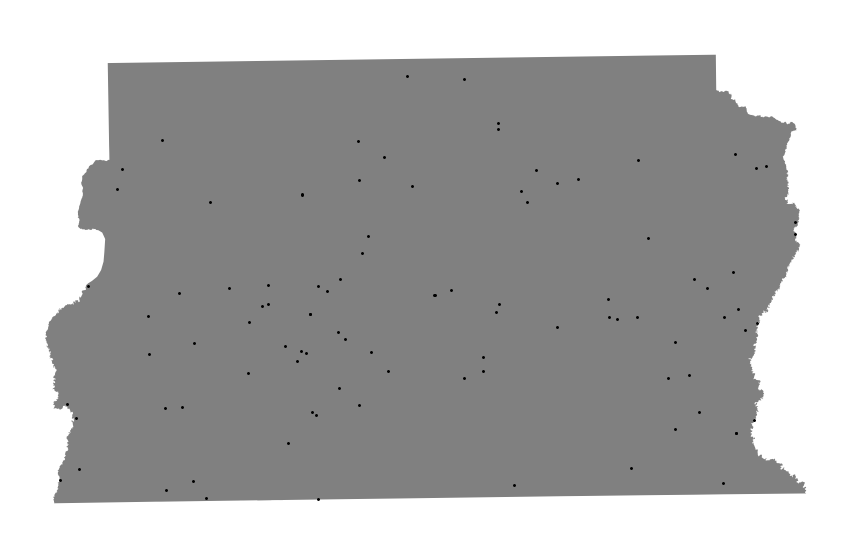

In [ ]:
fig, ax = plt.subplots()
limite.plot(ax=ax, color='gray')
est.plot(ax=ax, markersize=3.5, color='black')
ax.axis('off')
plt.axis('equal')
plt.show()

In [ ]:
limite_shape = cascaded_union(limite.geometry)
coords = points_to_coords(est.geometry)

In [ ]:
poligonos, pts = voronoi_regions_from_coords(coords, limite_shape)

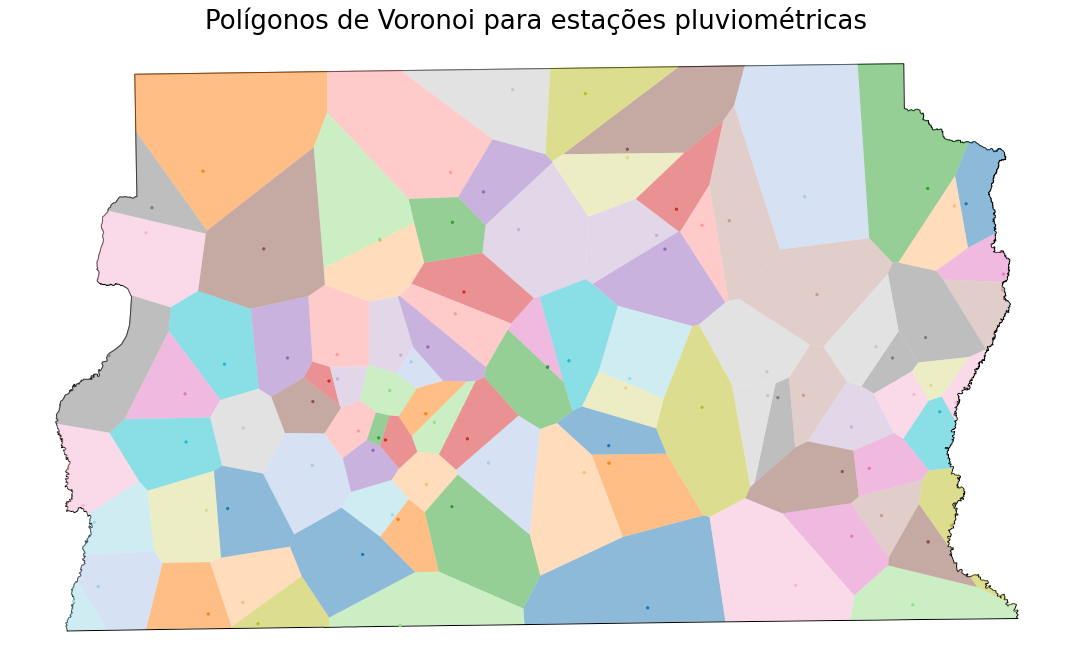

In [ ]:
fig, ax = subplot_for_map()
plot_voronoi_polys_with_points_in_area(ax, limite_shape, poligonos, coords, pts)
ax.set_title('Polígonos de Voronoi para estações pluviométricas', fontsize=26)
plt.tight_layout()
plt.show()